<a href="https://colab.research.google.com/github/natrask/ENM1050/blob/main/Code%20examples/Lecture06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A few changes of note**
1. From now on you are free to choose your partner as you'd like.
2. I *strongly* suggest you work with a new partner every exercise - anybody can learn Python from Youtube videos, not everybody can network with Penn students while they do it!
3. Consider your learning style when choosing a partner, but challenge yourself! It's a known psychological fact that leaders are prone to surrounding themselves with people of similar personality types. If you pick a partner who thinks differently from you, you are building soft skills that are important for working with and leading future teams with diverse strengths.
4. Now that we know the basics, we will be doing more substantial in-class exercises that will require more careful thought and planning.

#**Solving nonlinear equations: Newton's method, the secant method, and bisection**#

#CONTRIBUTORS#

This in-class exercise is to be done in pairs. Add the names of the two students in this text block.


# An introduction to functions #

So far in this course, we've used many of Pythons built in functions, as well as some functions from packages. But what is a function, and how can we confidently define our own? We will discuss the details of them in the coming week, but for now we will run through the basic syntax to facilitate todays lecture, which is our first dive into scientific computing.

**Basic syntax**

```
def myFunction(input_variable_1,input_variable_2):
     # code to be executed
     return value_to_return # optional value to return; can omit this line
```

Here are two examples of functions that either return a value, or do not return a value:

In [2]:
def add_two_numbers(num1,num2):
  sum = num1 + num2
  return sum

def print_a_greeting(persons_name):
  print("Hello " + persons_name + "!")

#The following is how to call a function after it has been defined
print(add_two_numbers(1,2))
print_a_greeting("ENM1050 student")

3
Hello ENM1050 student!


A built-in python function that we will use a lot of today is *eval*. This function takes in a string and executes it as a python expression. We will use this as a way of parsing user input to built a calculator for finding the roots of a function.





In [5]:
a = 1
b = 2
print(eval('a+b'))
print(eval('add_two_numbers(a,b)'))

3
3


# Put it together
In the next few exercises, we will generate code to plot an arbitrary function and its derivative.

Below is code to define a function, and generate a plot for values ranging from 0 to 1

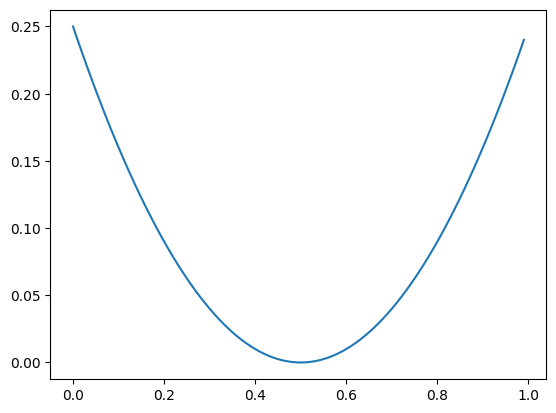

In [12]:
def function_to_plot(x):
  return 18*x**2 + 3*x + 1

import matplotlib.pyplot as plt
x = []
y = []
for i in range(100):
  newx = float(i)/100   # Why do we need to wrap i in a float? Try to see what happens if you just do i/100
  x.append(newx)
  y.append(function_to_plot(newx))
plt.plot(x,y)

**Your turn:** Update the code above to take in a string as user input of a function to be plotted, and use eval to alter the function to be plotted
```
Input function of x to be plotted: (x-0.5)**2

```
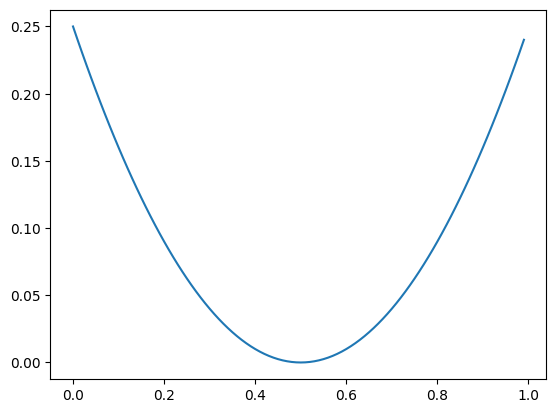



**Food for thought:**
*   This is an example of *abstraction*, where we can use a function to highlight a module of our code which can be swapped in and out as a "black-box"
*   eval is easy to use, but also hard to manage the user input for - how can you do error checking to ensure the user has provided a valid mathematical expression?



In class today we saw three different way of approximating a first derivative:


```
  > dudx[i] =     (u[i]   - u[i-1])/ (x[i]   - x[i-1])     # Backward difference
  > dudx[i] =     (u[i+1] - u[i]  )/ (x[i+1] - x[i]  )     # Forward difference
  > dudx[i] = 0.5*(u[i+1] - u[i-1])/ (x[i+1] - x[i-1])     # Centered difference
```

**Your turn:** The code block below attempts to calculate the derivative of a function using centered differences, but runs into an issue for the first and last entry of the list when it tries to i < 0 or i > len(list)-1. Use a conditional statement to catch these edge cases and switch to one of the other difference formulas.

*Hint:* To confirm whether your code is correct, always make sure your approximation can reproduce a simple to calculate by hand case. For example, the derivative of $u(x) = x^2$ is $\frac{du}{dx}(x) = 2x$. Use this fact to confirm you got the correct answer.


**Your turn:** Describe in English what is happening when you evaluate the center difference formula for i = 0 or i = 99.

In [13]:
def function_to_plot(x):
  return 18*x**2 + 3*x + 1

import matplotlib.pyplot as plt
x = []
y = []
for i in range(100):
  newx = float(i)/100   # Why do we need to wrap i in a float? Try to see what happens if you just do i/100
  x.append(newx)
  y.append(function_to_plot(newx))

dydx = []
for i in range(100):
  new_dydx = 0.5*(y[i+1] - y[i-1])/(x[i+1] - x[i-1])
  dydx.append(new_dydx)

plt.plot(x,y)
plt.plot(x,dydx)
plt.show()

IndexError: list index out of range

# Newton solve #

In class today we learned about Newton's method, which is a technique to numerically find roots of nonlinear equations. Remember when using Newton's method, you need to put your equation into the format:

$$f(x) = 0$$

This means that if you are interested in solving an equation that looks like:

$$g(x) = c$$
e.g.
$$x^2 - 4x = 7$$

you need to define
$$f(x) = g(x) - c.$$

Newton's method in pseudo-code looks like:
```
  > TOL = some_small_number                                # set a tolerance for how close to zero
  > oldguess = make_an_initial_guess
  > while abs(error) > TOL                                  # Take steps until tolerance is met
    > newguess = oldguess - f(oldguess)/f'(oldguess)
```

Think through what can go wrong with this! What happens if you have a guess with zero derivative?

**Your turn:** Adapt your code from above to solicit two functions from the user: one defining a function and another defining its derivative.


In [14]:
# Put code here

**Your turn:** How can you confirm the user provided the correct derivative? You don't need to implement this, but describe in text below.


**Your turn:** I've provided a skeleton below to get you started - flesh this out to build your own Newton solver. I have set this up so that at each step we append our latest guess to a list. This will make it easy to visualize the progression of the solver when we're done.

**Tips:**

*   Newton's method only works for a *good enough initial guess*. To get your code up and running, work with an example where you know ahead of time what the derivative and the roots are - if you can reproduce a known simple result then you know you've done everything correctly.
*   Before you get started, make a plot of your function and confirm visually that you're close to a root.
*   Watch out for infinite loops! If the error isn't decreasing your code will repeat the while loop indefinitely. A strategically placed *break* statement could be helpful to catch and prevent this behavior if the code has been running for too long.

In [19]:
TOL = 1e-3
guess_list = []
initial_guess = 0.0                                   # pick a good initial guess to put in here
guess_list.append(initial_guess)

# Everything is set up, now we can start the iterative process
while( abs(guess_list[-1]) > TOL):
  oldguess = guess_list[-1]
  fold = 0.0                                          # function_to_plot(oldguess)
  dfdxold = 0.0                                       # derivative_of_function_to_plot(oldguess)
  newguess = 0.0                                      # oldguess - fold/dfdxold
  guess_list.append(newguess)

  print('Old guess, f(old guess), new guess: ',oldguess, fold, newguess)

0.1
0.010000000000000002
0.0010000000000000002
0.00010000000000000003


**Your turn:** Plot your function as a blue line, with the guesses predicted by your Newton solver super imposed as red dots. You may need to set the plot axes to zoom in appropriately around the root.

**Your turn (challenge):** What if you don't have access to the derivatives of the function? Alter your code above to implement the **secant method** to find roots without calling a function to evaluate derivatives.

# Using 'off-the-shelf' libraries to solve nonlinear equations #

Wow - that was a lot of work. You don't need to write all that code every time you need to solve a nonlinear equation. I wrote the following single AI prompt to fetch a code snippet that pulls out a function from the scientific computing python library [SciPy](https://scipy.org/) that completes the same task. (You'll see that Gemini did some silly things - the code below works, but it defines a completely redundant function). SciPy will have many of the methods we study in this class already implemented. The challenge with using either AI or SciPy is that, unless you understand the underlying method, you will have no idea what to do if it gives the wrong answer, or how to choose options from the library that will be better tailored to your specific scientific computing problem.

In [ ]:
from scipy.optimize import fsolve

def function_to_plot(x):
  return 18*x**2 + 3*x + 1

# Define the function for fsolve
def func(x):
  return function_to_plot(x)

# Initial guess
initial_guess = 0.0

# Solve the equation
result = fsolve(func, initial_guess)

print("Solution:", result)


#**Turning in assignments on Canvas**#

In order to submit your assignment as a pair, you need to create a group on Canvas. This will enable you to both receive the same grade for one submission.
1. On Canvas, navigate to `People > Groups > In-Class 05`.
1. Find an empty group and add the names of both members of the pair.


Submit your work as both an ipynb and a pdf to Canvas.
1. Click on `File > Download .ipynb` to download the ipynb file. Do NOT clear your outputs before doing this step.
1. Click on `File > Print` to print the notebook to a pdf. This is a backup for the graders in case we are not able to access or run your ipynb during grading.
1. On Canvas, navigate to the relevant assignment and attach both the ipynb and pdf files to your submission.
1. The student who did not submit should make sure that the group was created successfully by checking that they can also access the files on their Canvas page.